# 1. Linear Regression

## 1.1. Algorithm
[Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) finds the best fitting hyperplane that represents the linear relationship between the output variable $\mathbf{y}$ and the input variables $\mathbf{x}_1,\mathbf{x}_2,\dots$. The regression function is:

$$\hat{\mathbf{y}} = w_0+w_1\mathbf{x}_1+w_2\mathbf{x}_2+\dots$$

where:
- $\mathbf{y}$ is the output variable
- $\hat{\mathbf{y}}$ is the estimation of $\mathbf{y}$
- $\mathbf{x}_1,\mathbf{x}_2,\dots$ are the input variables
- $w_0,w_1,w_2,\dots$ are the parameters

The [Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) (OLS) method used in Linear Regression considers the loss function:

$$\mathcal{L}(\mathbf{w}) = \mbox{SSE}=\sum_{n=1}^{N}(y_n-\hat{y}_n)^2$$

The vector of parameters $\mathbf{w}$ is estimated as: $\mathbf{w} =\arg\min \mathcal{L}(\mathbf{w})$.

### Regularization
Linear Regression itself has no hyperparamater, however there are alternative algorithms, [Ridge Regression](https://en.wikipedia.org/wiki/Ridge_regression) and [Lasso Regression](https://en.wikipedia.org/wiki/Lasso_(statistics)). They work almost the same way with the OLS regression, but they add a *penalty/regularization* term $\mathcal{R}(\mathbf{w})$ to the loss function to form an *objective function* $\mathcal{O}(\mathbf{w})$. A coefficient $\alpha$ is attached to $\mathcal{R}(\mathbf{w})$ in order to control how significant that penalty term is. $\alpha$ can be considered as a hyperparameter, and the value is usually set to $\alpha=10^k$ for $k\in[-5,5]$.

The objective function for Ridge Regression ($L_2$ regularization):

$$\mathcal{O}(\mathbf{w}) = \sum_{n=1}^{N}(y_n-\hat{y}_n)^2 + \alpha\sum_{n=1}^{N} w_n^2$$

The loss function for Lasso Regression ($L_1$ regularization):

$$\mathcal{O}(\mathbf{w}) = \frac{1}{2N}\sum_{n=1}^{N}(y_n-\hat{y}_n)^2 + \alpha\sum_{n=1}^{N}|w_n|$$

Ridge and Lasso Regression are quite similar, the only difference between them is when $\alpha$ becomes very high, Ridge Regression can only shrink the parameters asymptotically close to 0, while Lasso Regression can shrink the parameters all the way to 0. Therefore, Lasso Regression can lead to feature selection by letting the unrelated variables have their weights of 0.

### Elastic Net
[Elastic Net](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net) is the combination of Ridge Regression and Lasso Regression. It uses the following loss function:

$$\mathcal{O}(\mathbf{w}) =
\frac{1}{2N}\sum_{n=1}^{N}(y_n-\hat{y}_n)^2 +
\alpha\left(\beta\sum_{n=1}^{N}{|w_n|}+\frac{1-\beta}{2}\sum_{n=1}^{N}{w_n^2}\right)$$

where $\alpha$ is the magnitude and $\beta$ is the $L_1$ ratio.

## 1.2. Implementation
Scikit-learn implements Linear Regression and its regularized variants via a number of classes, but I prefer
<code style='font-size:13px'><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html">ElasticNet</a></code>
as it already covered other methods. It has the following hyperparameters:
- <code style='font-size:13px; color:#BA2121'>alpha</code>: the multiple of the regularization term ($\alpha$), defaults to *1*.
- <code style='font-size:13px; color:#BA2121'>l1_ratio</code>: the ratio between $L_1$ and $L_2$ regularization ($\beta$), defaults to *0.5*.

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, r2_score as R2
from sklearn.preprocessing import StandardScaler

In [2]:
dfBoston = pd.read_csv('data/boston.csv')
dfBoston.head()

,crime_rate,land_rate,indus,chas,nox,room,age,distance,radial,tax,ptratio,black,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
x = dfBoston.copy()
y = x.pop('price')
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=7)

In [4]:
start = dt.datetime.now()

algo = ElasticNet()
params = {
    'alpha': np.logspace(-2, 2, 5),
    'l1_ratio': np.linspace(0.2, 0.8, 4),
}
validator = GridSearchCV(algo, params, cv=5, scoring='r2')
validator = validator.fit(xTrain, yTrain)
model = validator.best_estimator_

end = dt.datetime.now()
print(end - start)

0:00:00.379270


In [5]:
validator.best_params_

{'alpha': 0.01, 'l1_ratio': 0.8}

In [7]:
yTestPred = model.predict(xTest)
r2Test = R2(yTest, yTestPred)
modelName = model.__class__.__name__

print(f'R2 = {r2Test:.4f} [{modelName}]')

R2 = 0.5698 [ElasticNet]


### Feature importances
The coeficients of the regression function tell us how each input variable affects the target variable. We can use these values with some tweaks to get feature importances: (1) get the absolute values and (2) standardize variables so that they are on the same scale.

In [30]:
scaler = StandardScaler().fit(xTrain)
xTrainScaled = scaler.transform(xTrain)

modelScaled = ElasticNet(**validator.best_params_)
modelScaled = modelScaled.fit(xTrainScaled, yTrain)

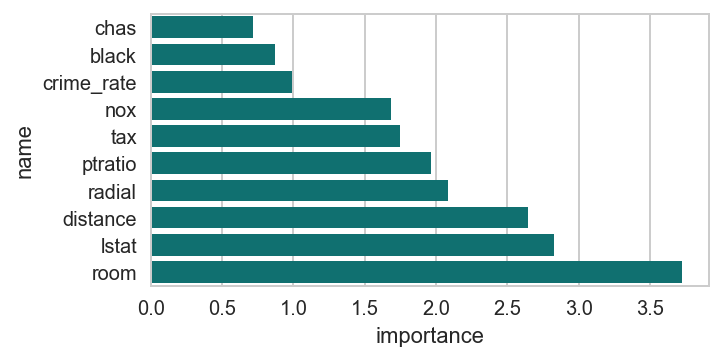

In [31]:
nTop = 10

df = pd.DataFrame({'name': model.feature_names_in_, 'importance': np.abs(modelScaled.coef_)})
df = df.sort_values('importance')
df = df.query("importance > 0")
df = df.tail(nTop)

fig, ax = plt.subplots(figsize=(5,2.5))
sns.barplot(data=df, x='importance', y='name', color='teal')
plt.show()

# 2. Polynomial Regression

## 2.1. Algorithm
Linear Regression, in fact is the simplest case of a more general algorithm, Polynomial Regression. Polynomial Regression applies a polynomial to a variable, while Linear Regression only uses a monomial with the degree of 1.

Performing Polynomial Regression is actually performing Linear Regression on transformed data. To make this process easier to understand, let's say there are two input variables, $(\mathbf{x}_1,\mathbf{x}_2$), and a output variable, $\mathbf{y}$. Now apply Linear Regression on new transformed sets of input such as $(\mathbf{x}_1, \mathbf{x}_1^2, \mathbf{x}_2)$, $(\mathbf{x}_1, \mathbf{x}_2, \mathbf{x}_1^2, \mathbf{x}_2^2, \mathbf{x}_1\mathbf{x}_2)$ or $(\mathbf{x}_1^{-1}, \ln\mathbf{x}_2)$.

A huge disadvantage of Polynomial Regression is that it can easily lead to overfitting. Think about a function that fits perfectly all data points, it also captures the noises and definitely cannot perform well on predicting data it has never seen before. Therefore, how to choose the right function for each variable is more of an art than a science. It requires to visualize every single variable, and look carefully at the variation and the possible extrema.

## 2.2. Implementation
In this section, we use only one input variable, <code style='font-size:13px;'>lstat</code> ($\mathbf{x}$), to predict <code style='font-size:13px;'>price</code> ($\mathbf{y}$). First, the relationship between $\mathbf{x}$ and $\mathbf{y}$ is visualized, but notice that the two axes must have the same scale. Then, try several strategies to choose a function that you think best describes the general trend in the data. An aspect ratio other than 1 makes the slope/sensitivity look different, and probably you will make a wrong decision.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
dfBoston = pd.read_csv('data/boston.csv')
dfBoston.head()

,crime_rate,land_rate,indus,chas,nox,room,age,distance,radial,tax,ptratio,black,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
x = dfBoston.lstat.values.reshape(-1,1)
y = dfBoston.price.values

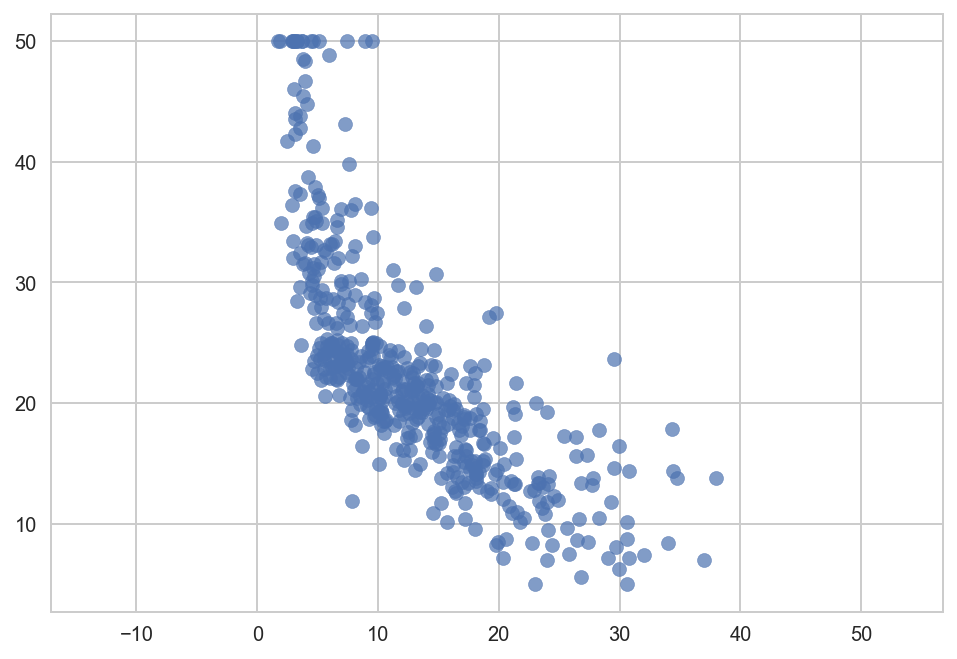

In [10]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.7)
ax.axis('equal')
plt.show()

### Monomial Regression
To best describe the trend in the data, a line (in Linear Regression) is just too simple, so we are going to need a curve. A power function may be useful in this case.

$$\hat{\mathbf{y}} = w_0+w_1\mathbf{x}^{-\frac{3}{4}}$$

In [13]:
transformer = FunctionTransformer(lambda x: x**(-3/4))
xNew = transformer.transform(x)

xTrain, xTest, yTrain, yTest = train_test_split(xNew, y, test_size=0.2, random_state=7)

In [17]:
algo = LinearRegression()
model = algo.fit(xTrain, yTrain)

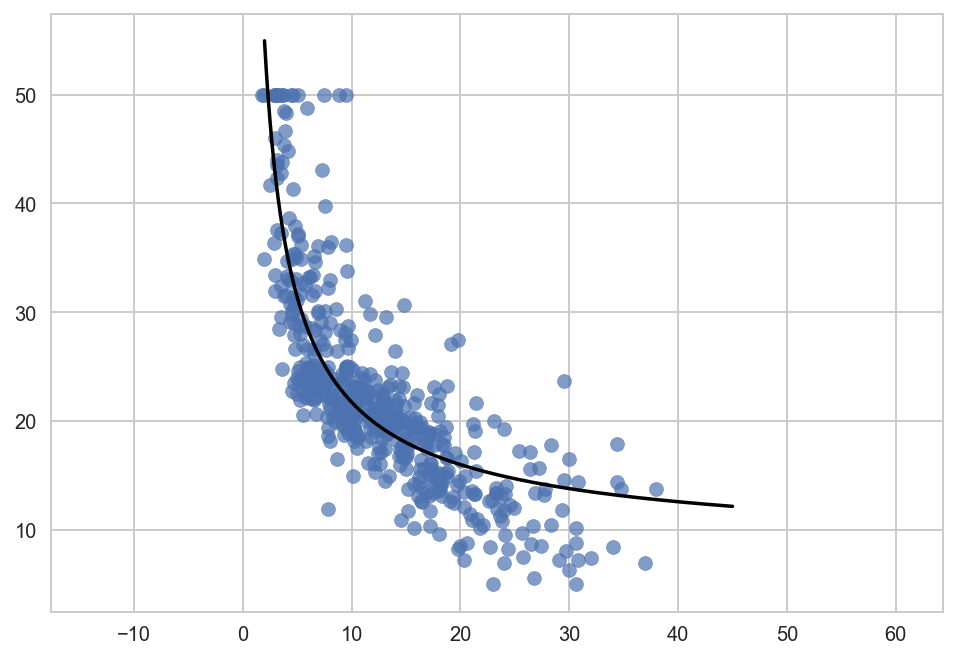

In [18]:
xPlot = np.linspace(2, 45, 1000).reshape(-1,1)
yPlot = model.predict(transformer.transform(xPlot))

fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.7)
ax.plot(xPlot, yPlot, 'k')
ax.axis('equal')
plt.show()

In [20]:
yTestPred = model.predict(xTest)
r2Test = R2(yTest, yTestPred)
modelName = 'MonomialRegression'

print(f'R2 = {r2Test:.4f} [{modelName}]')

R2 = 0.6700 [MonomialRegression]


### Polynomial Regression
Monomial Regression seems did not perform very well, let's try Polynomial Regression this time. As observed, the distribution of the data looks like a part of a parabola (there is one possible minimum). The prediction function will be:

$$\hat{\mathbf{y}} = w_0+w_1\mathbf{x}+w_2\mathbf{x}^2$$

In [21]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
xNew = transformer.fit_transform(x)

xTrain, xTest, yTrain, yTest = train_test_split(xNew, y, test_size=0.2, random_state=7)

In [23]:
algo = LinearRegression()
model = algo.fit(xTrain, yTrain)

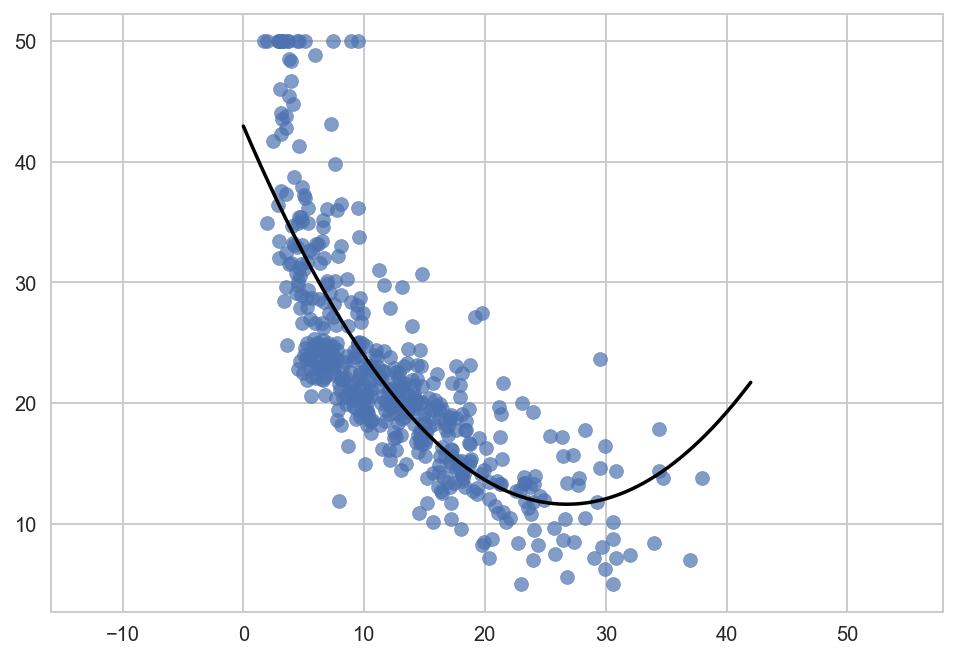

In [24]:
xPlot = np.linspace(0, 42, 1000).reshape(-1,1)
yPlot = model.predict(transformer.transform(xPlot))

fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.7)
ax.plot(xPlot, yPlot, 'k')
ax.axis('equal')
plt.show()

In [25]:
yTestPred = model.predict(xTest)
r2Test = R2(yTest, yTestPred)
modelName = 'PolynomialRegression'

print(f'R2 = {r2Test:.4f} [{modelName}]')

R2 = 0.6247 [PolynomialRegression]


# 3. Logistic Regression

## 3.1. Algorithm
In [Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), the output variable $\mathbf{y}$ has exactly two possible values labeled 1 (positive) and 0 (negative). The algorithm outputs a number in the interval $[0,1]$ describing the probability that an observation falls into the positive class. Therefore, Logistic Regression is used in classification. The regression function is:

$$\mathbf{p} = \frac{1}{1+\exp({-w_0-w_1\mathbf{x}_1-w_2\mathbf{x}_2-\dots})}$$

where:
- $\mathbf{y}=(y_1,y_2,\dots,y_N)$ is the output variable
- $\mathbf{p}=(p_1,p_2,\dots,p_N)$ is the predicted probability and $p_n=P(y_n=1|\mathbf{s}_n;\mathbf{w})$ is the probability that $y_n=1$
- $\mathbf{x}_1,\mathbf{x}_2,\dots$ are the input variables
- $w_0,w_1,w_2,\dots$ are the model parameters

Another form of the regression function that emphasizes the odds ratio (success over failed) is sometimes used:

$$\log(\frac{\mathbf{p}}{1-\mathbf{p}}) = w_0+w_1\mathbf{x}_1+w_2\mathbf{x}_2+\dots$$

The regression function can be rewritten: $\mathbf{p}=f(\mathbf{X}\mathbf{w})$, where $f$ stands for the standard logistic function. The derivative of $f$ follows logistic distribution.

$$f(x)=\frac{1}{1+e^{-x}}$$

### Loss function
Derived from the regression function, we have $P(\mathbf{y}=1)=f(\mathbf{X}\mathbf{w})$ and $P(\mathbf{y}=0)=1-f(\mathbf{X}\mathbf{w})$. Summarizing these two functions gives the likelihood:

$$P(\mathbf{y}=y|\mathbf{X}) = p^y(1-p)^{1-y} = \prod_{n=1}^{N}{p_n^{y_n}(1-p_n)^{1-y_n}}$$

Our approach is to maximize the likelihood, alongside with the log-likelihood. Therefore, the negative log-likelihood is chosen to be the loss function.

$$\mathcal{L}(\mathbf{w}) = -\log P(\mathbf{y}|\mathbf{X}) = \sum_{n=1}^{N}{\left[y_n\log{p_n}+(1-y_n)\log{(1-p_n)}\right]}$$

The vector of parameters $\mathbf{w}$ is estimated as: $\hat{\mathbf{w}} =\arg\min \mathcal{L}(\mathbf{w})$.

## 3.2. Implementation
The class
<code style='font-size:13px'><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">LogisticRegression</a></code>
has the following hyperparameters:
- <code style='font-size:13px; color:#BA2121'>C</code>: the multiple of the loss term ($C$), defaults to *1*.
- <code style='font-size:13px; color:#BA2121'>l1_ratio</code>: the ratio between $L_1$ and $L_2$ regularization ($\beta$), defaults to *0.5*.

In [53]:
import numpy as np; np.set_printoptions(precision=4, suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score as AUC, fbeta_score as FScore
import warnings; warnings.filterwarnings('ignore')

In [32]:
dfCancer = pd.read_csv('data/breast_cancer.csv')
x = dfCancer.drop(columns='target')
y = dfCancer.target
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=1)

In [44]:
start = dt.datetime.now()

params = {
    'solver': ['saga'],
    'penalty': ['elasticnet'],
    'max_iter': [1000],
    'C': [1],
    'l1_ratio': [0.5],
}

algo = LogisticRegression()
validator = GridSearchCV(algo, params, cv=5, scoring='roc_auc')
validator = validator.fit(xTrain, yTrain)
model = validator.best_estimator_

print(dt.datetime.now() - start)

0:00:00.970150


In [47]:
yTestPred = model.predict_proba(xTest)[:, model.classes_==1]
aucTest = AUC(yTest, yTestPred)
modelName = model.__class__.__name__

print(f'AUC = {aucTest:.4f} [{modelName}]')

AUC = 0.9590 [LogisticRegression]


In [86]:
model.coef_

array([[ 0.0091,  0.0123,  0.0512,  0.0155,  0.    , -0.    , -0.0002,
        -0.    ,  0.0001,  0.    ,  0.0001,  0.0009,  0.0001, -0.0118,
         0.    ,  0.    , -0.    ,  0.    ,  0.    ,  0.    ,  0.0096,
         0.0143,  0.049 , -0.0245,  0.0001, -0.0003, -0.0005, -0.0001,
         0.0002,  0.    ]])

# 4. Gaussian Process
Gaussian Process is a random process assumes that the underlying function $f:\mathbf{X}\mapsto\mathbf{y}$ follows an infinite dimensional multivariate Gaussian distribution. In other words, every point in the input space follows a normal distribution and their joint distribution represents the function to be learned. In this section, we are going to use Gaussian Process to model the following function:

$$f(x)=0.03 x^5+0.2x^4-0.1x^3-2.4x^2-2.5x+6$$

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt; plt.style.use(['seaborn', 'seaborn-whitegrid'])
import seaborn as sns
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.gaussian_process import GaussianProcessRegressor
%config InlineBackend.figure_format = 'retina'

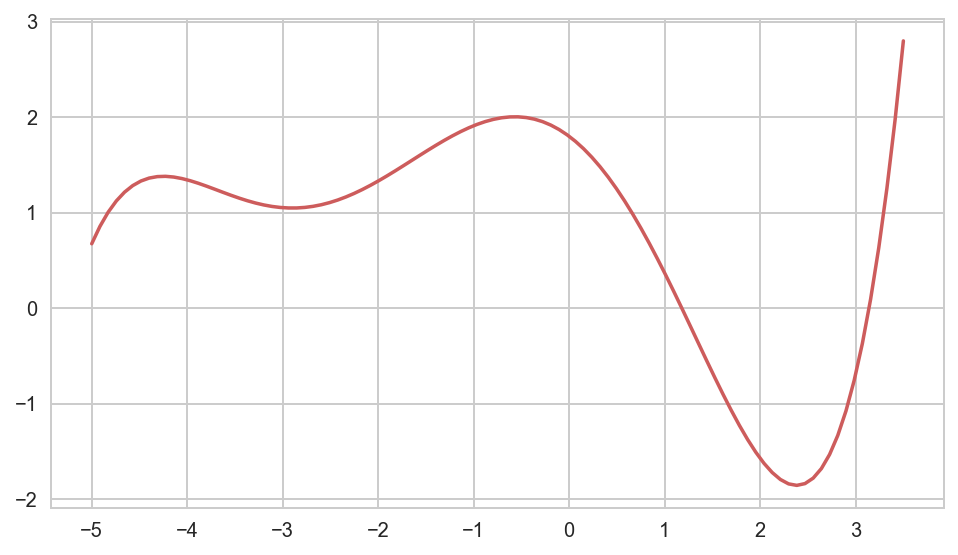

In [10]:
f = lambda x: 0.009*x**5 + 0.06*x**4 - 0.03*x**3 - 0.72*x**2 - 0.75*x + 1.8

x = np.linspace(-5, 3.5, 100)
y = f(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'indianred')
ax.axis('scaled')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
plt.show()

## 4.1. Smoothing with kernels
To make things simple, the Gaussian distribution used in Gaussian Process has a mean vector of zeros: $\boldsymbol{\mu}=\mathbf{0}$. The covariance matrix, $\boldsymbol{\Sigma}$ is designed so that closer points in the input space have a higher covariance. To achieve this, RBF kernel is applied pair-wisely to the input space:

$$\kappa(x_i,x_j)=\exp\left(-\frac{d(x_i,x_j)^2}{2l^2}\right)$$

Here, $l$ is a tunable hyperparameter. The covariance matrix is then constructed: $\boldsymbol{\Sigma}[i,j]=\kappa(x_i,x_j)$. Also note that there are a lot of different kernels to choose, but RBF is the most common one. The heatmap of the covariance matrix will have a higher score at coordinates around the main diagonal.

In [3]:
kernel = RBF()
x = np.linspace(1, 20, 500).reshape(-1,1)
sigma = kernel.__call__(x)

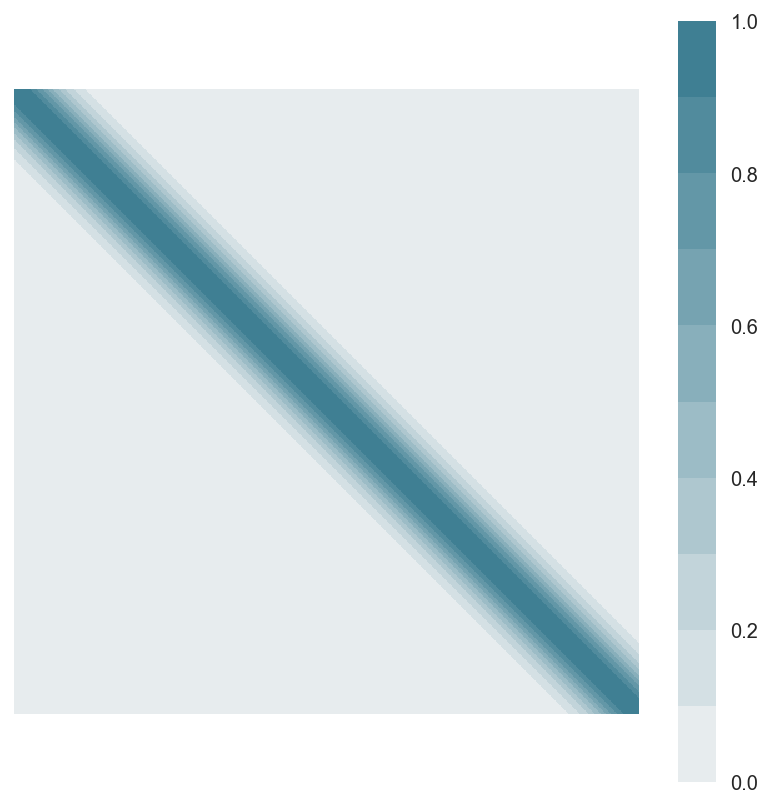

In [4]:
palette = sns.diverging_palette(20, 220, n=20)[10:]
plt.figure(figsize=(7,7))
sns.heatmap(sigma, cmap=palette, square=True, xticklabels=False, yticklabels=False)
plt.show()

## 4.2 Prior distribution
With the covariance matrix constructed from the previous step, we call $\mathcal{N}(\boldsymbol{\mu,\Sigma})$ the *prior distribution*. Recall that Gaussian Process is a random sampling process, and *prior distribution* is where samples drawn from. Below, 15 random samples have been drawn using this special covariance matrix. We can observed that each sample (curve) has some sort of smoothness as points pull their neighbors.

In [5]:
d = 100

kernel = RBF()
x = np.linspace(-5, 5, d).reshape(-1,1)
sigma = kernel.__call__(x)
mu = np.zeros(d)

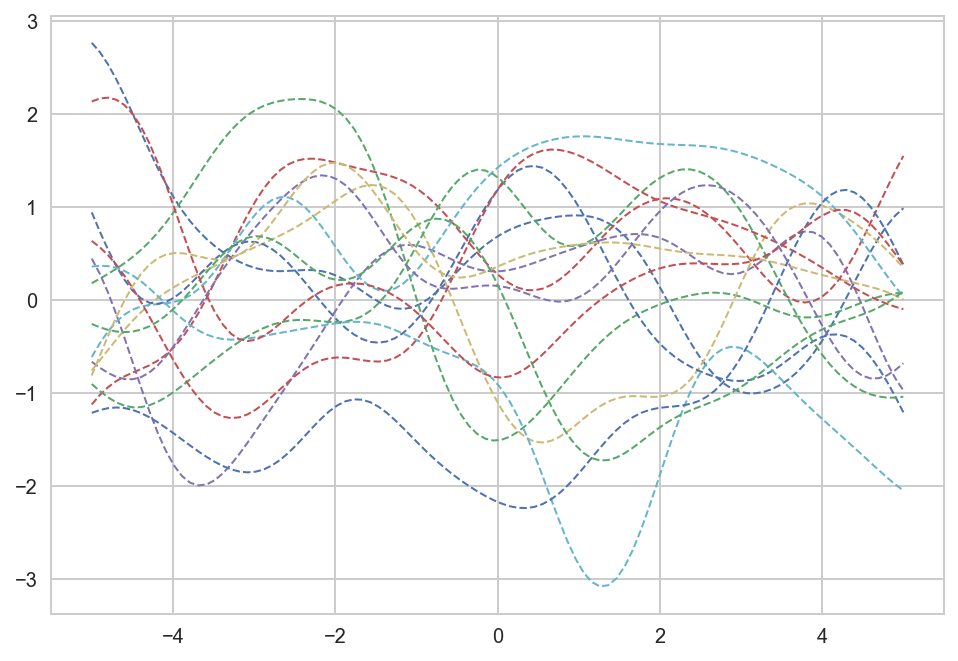

In [6]:
dist = stats.multivariate_normal(mu, sigma, allow_singular=True)
for _ in range(15):
    y = dist.rvs()
    plt.plot(x, y, '--', lw=1)

## 4.3. Posterior distribution
Now, what if we observe some labeled data? First, we add training label to the mean vector and their variance of $0$ as well as to the input space. Then we use a technique called *conditioning* to update new information into the current distribution. You can think of *conditioning* as a cut through the distribution at training data, giving us the distribution of unobserved data. This distribution is called the *posterior distribution*.

Look at the graphs below, we observe that the *updated* covariances around the training points are lower. The prediction interval also looks shrinking at these points.

In [20]:
f = lambda x: 0.009*x**5 + 0.06*x**4 - 0.03*x**3 - 0.72*x**2 - 0.75*x + 1.8

np.random.seed(7)
xTrain = np.array([-4, -1, 1, 3])
yTrain = f(xTrain)

xTest = np.linspace(-5, 3.5, 100)
yTest = f(xTest)

In [21]:
algo = GaussianProcessRegressor()
model = algo.fit(xTrain.reshape(-1,1), yTrain)
meanPred, sigmaPred = model.predict(xTest.reshape(-1,1), return_std=True)
lower, upper = meanPred - sigmaPred, meanPred + sigmaPred

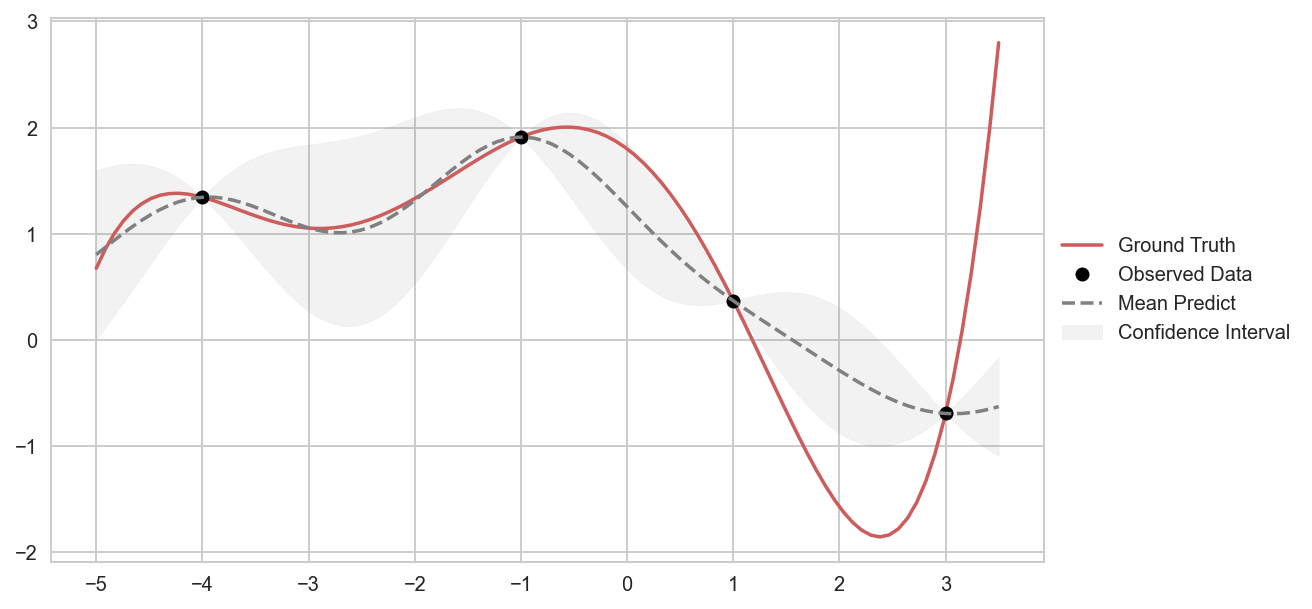

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(xTest, yTest, 'indianred', label='Ground Truth')
ax.plot(xTrain, yTrain, 'ok', label='Observed Data')
ax.plot(xTest, meanPred, '--', color='grey', label='Mean Predict')
ax.fill_between(xTest, lower, upper, alpha=0.1, color='grey', label='Confidence Interval')
ax.axis('scaled')
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

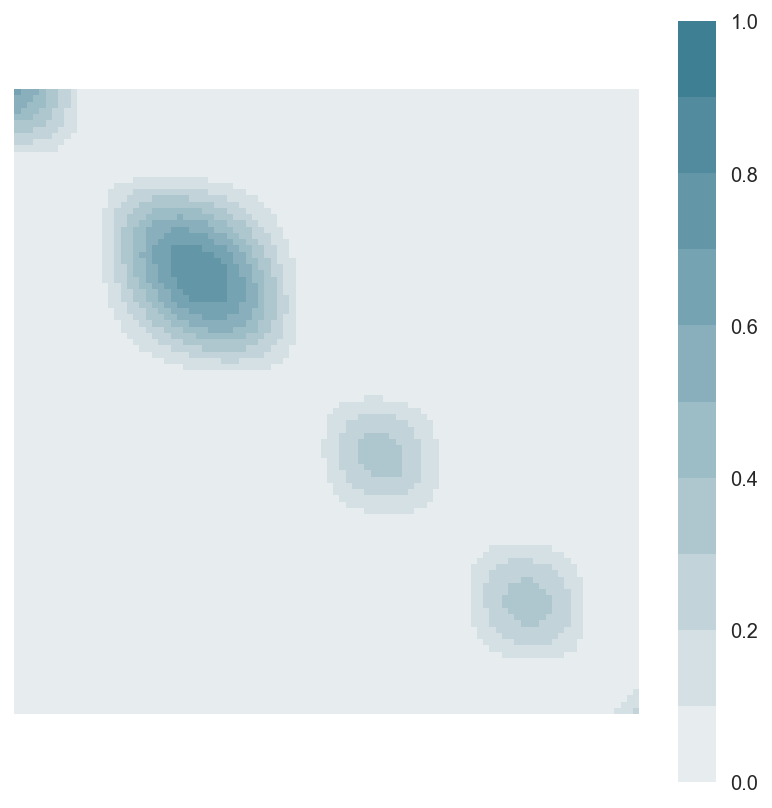

In [33]:
_, covMatrix = model.predict(xTest.reshape(-1,1), return_cov=True)

palette = sns.diverging_palette(20, 220, n=20)[10:]
plt.figure(figsize=(7,7))
sns.heatmap(covMatrix, cmap=palette, square=True, xticklabels=False, yticklabels=False, vmin=0, vmax=1,)
plt.show()

# 5. Classification counterparts
Most classification algorithms can be modified to adapt regression problems. In this section, we are going through 3 variants of classification algorithms: K-Nearest Neighbors, Decision Tree and Support Vector Machines.

## 5.1. Algorithms

### K-NN
The only modification needed is that K-NN performs *averaging* instead of voting when predicting the label for a query point. There are also simple averaging and weighted averaging.

### Decision Tree
Like K-NN, Decision Tree also performs averaging when predicting leaf values. But Decision Tree has another change in calculating information gain. To measure the quality of a leaf, it uses a loss function such as squared error and absolute error. The criteria used in regression preserve an importance property of impurity measures, *lower is better*.

### SVM
When applying SVM for regression, the concepts of separating hyperplane, boundary hyperplanes, soft margin and kernels are still being used. This time, SVM tries to find a hyperplane such that support vectors lie within the two boundaries. Points outside the boundaries are treated as acceptable errors.

## 5.2. Implementation
The implementation of classification counterparts in Scikit-learn are
<code style='font-size:13px'><a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html">KNeighborsRegressor</a></code>
<code style='font-size:13px'><a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html">DecisionTreeRegressor</a></code>
<code style='font-size:13px'><a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html">SVR</a></code>.
Their hyperparameters are very similar to their counterparts in classification.

In [4]:
import datetime as dt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, r2_score as R2

In [2]:
dfBoston = pd.read_csv('data/boston.csv')
dfBoston.head()

,crime_rate,land_rate,indus,chas,nox,room,age,distance,radial,tax,ptratio,black,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
x = dfBoston.copy()
y = x.pop('price')
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=7)

In [9]:
listAlgo = [
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    SVR()
]

start = dt.datetime.now()

for algo in listAlgo:
    model = algo.fit(xTrain, yTrain)
    yTestPred = model.predict(xTest)
    r2Test = R2(yTest, yTestPred)
    modelName = model.__class__.__name__
    print(f'R2 = {r2Test:.4f} [{modelName}]')

end = dt.datetime.now()
print('')
print(end - start)

R2 = 0.5383 [KNeighborsRegressor]
R2 = 0.6445 [DecisionTreeRegressor]
R2 = 0.1065 [SVR]

0:00:00.029757


# References
- *thegradient.pub* - [Gaussian Process, not quite for dummies](https://thegradient.pub/gaussian-process-not-quite-for-dummies/)
- *bridg.land* - [Introduction to Gaussian Process](http://bridg.land/posts/gaussian-processes-1)
- *distill.pub* - [A Visual Exploration of Gaussian Process](https://distill.pub/2019/visual-exploration-gaussian-processes/)
- *krasserm.github.io* - [Gaussian Process](https://krasserm.github.io/2018/03/19/gaussian-processes/)

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*